In [16]:
install.packages("ISLR")
install.packages("rpart")
install.packages("rattle")
install.packages("rpart.plot")
install.packages("RColorBrewer")
install.packages("party")
install.packages("partykit")
install.packages("caret")
install.packages("randomForest")

Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR' is in use and will not be installed"Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'rpart' is in use and will not be installed"Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'rattle' is in use and will not be installed"Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'rpart.plot' is in use and will not be installed"Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'RColorBrewer' is in use and will not be installed"Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'party' is in use and will not be in

package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"


The downloaded binary packages are in
	C:\Users\KASTU1\AppData\Local\Temp\Rtmp46GGDl\downloaded_packages


In [4]:
library(ISLR)
library(ggplot2)
library(rpart)				        # Popular decision tree algorithm
library(rattle)					# Fancy tree plot
library(rpart.plot)				# Enhanced tree plots
library(RColorBrewer)				# Color selection for fancy tree plot
library(party)					# Alternative decision tree algorithm
library(partykit)				# Convert rpart object to BinaryTree
library(caret)

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.4.4"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.4"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.4.4"
Attaching package: 'partykit'

The following objects are masked from 'package:party':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal

Loading required package: lattice


In [5]:
setwd("C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data")
credit = read.csv("credit.csv")
head(credit)
prop.table(table(credit$default))

checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no



 no yes 
0.7 0.3 

In [7]:
set.seed(1324)

idx = sample( nrow(credit), nrow(credit)*0.8) 

train = credit[ idx, ]
test = credit[ -idx, ]
nrow(train)
nrow(test)

[1] 800

[1] 200

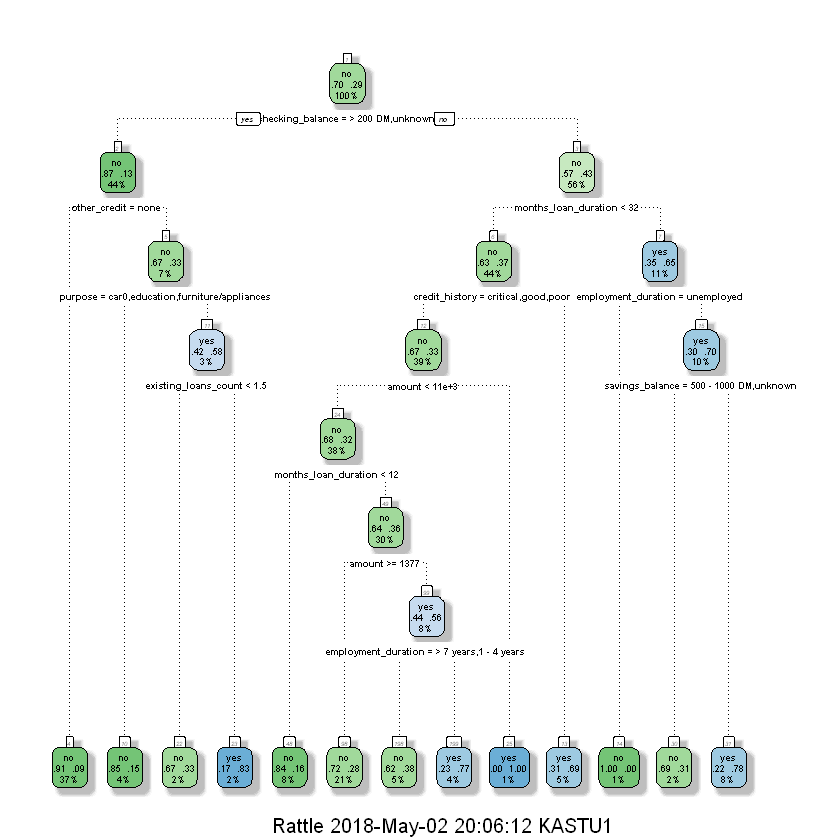

In [11]:
dtree1 = rpart(default ~ ., data=train, method="class")

fancyRpartPlot(dtree1 )

In [13]:

printcp(dtree1)
test$pred = predict(dtree1, newdata = test, type="class")


Classification tree:
rpart(formula = default ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] amount               checking_balance     credit_history      
[4] employment_duration  existing_loans_count months_loan_duration
[7] other_credit         purpose              savings_balance     

Root node error: 236/800 = 0.295

n= 800 

        CP nsplit rel error  xerror     xstd
1 0.055085      0   1.00000 1.00000 0.054656
2 0.029661      3   0.82203 0.89407 0.052813
3 0.024011      5   0.76271 0.85593 0.052068
4 0.021186      8   0.69068 0.86441 0.052237
5 0.011299      9   0.66949 0.88559 0.052651
6 0.010000     12   0.63559 0.92797 0.053438


In [14]:
#### confusion matrix 

table( test$default, test$pred)

     
       no yes
  no  117  19
  yes  45  19

     
       no yes
  no  117  19
  yes  45  19

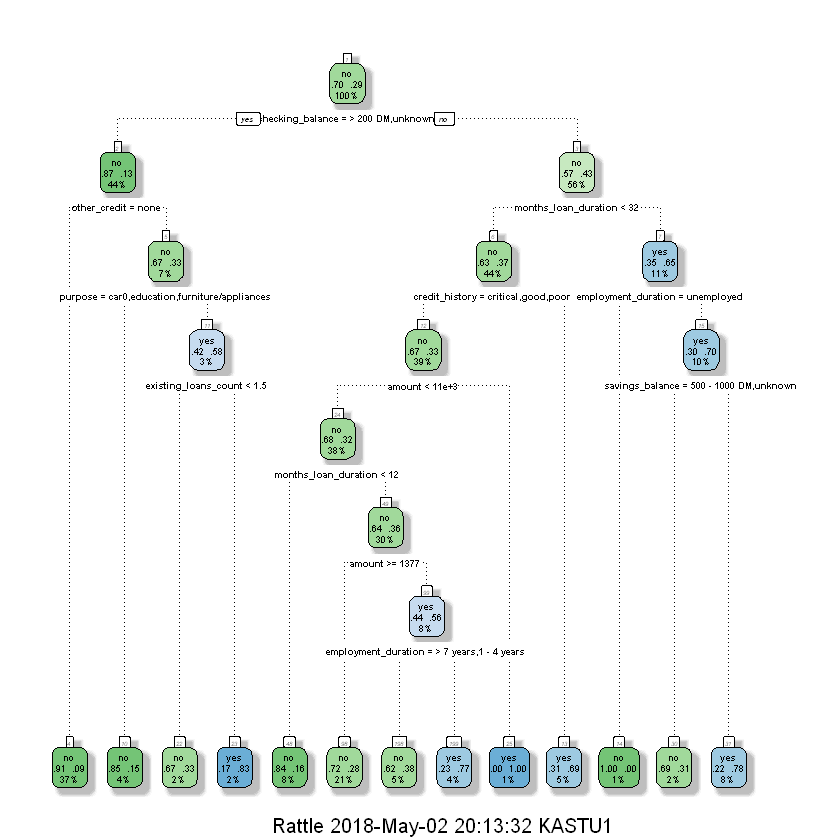

In [15]:
## Pruning
tree2 = prune( dtree1, cp = 0.011299)
fancyRpartPlot(tree2)

### performance of pruned tree 

test$pred2 = predict( tree2 , newdata = test , type="class")

table( test$default, test$pred2)

Installing package into 'C:/Users/KASTU1/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"


The downloaded binary packages are in
	C:\Users\KASTU1\AppData\Local\Temp\Rtmp46GGDl\downloaded_packages
